In [39]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from math import sqrt

In [61]:
# read the data file 
d = pd.read_csv('drug200.xls',sep=',')

d.loc[d['Sex']=='M','Sex'] = 1
d.loc[d['Sex']=='F','Sex'] = 0
d.loc[d['BP']=='HIGH','BP'] = 2
d.loc[d['BP']=='NORMAL','BP'] = 1
d.loc[d['BP']=='LOW','BP'] = 0
d.loc[d['Cholesterol']=='HIGH','Cholesterol'] = 1
d.loc[d['Cholesterol']=='NORMAL','Cholesterol'] = 0
d.loc[d['Drug']=='drugA','Drug'] = 0
d.loc[d['Drug']=='drugB','Drug'] = 1
d.loc[d['Drug']=='drugC','Drug'] = 2
d.loc[d['Drug']=='drugX','Drug'] = 3
d.loc[d['Drug']=='DrugY','Drug'] = 4
d = d.sort_values('Drug')
display(d)

# separate the data and the classes and normalize the data 
df = d.drop(['Drug'],axis=1)
data = pd.DataFrame(preprocessing.normalize(df),columns=['Age','Sex','BP','Cholesterol','Na_to_K'])
display(data)

target = d['Drug']
display(target)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
66,29,1,2,1,12.856,0
144,39,1,2,1,9.664,0
118,32,0,2,0,10.292,0
110,50,1,2,1,7.490,0
36,32,1,2,0,9.445,0
...,...,...,...,...,...,...
74,31,1,2,0,17.069,4
73,41,0,1,0,22.905,4
71,28,0,1,1,19.675,4
68,54,1,1,1,24.658,4


,Age,Sex,BP,Cholesterol,Na_to_K
0,0.911483,0.031430,0.062861,0.031430,0.404070
1,0.968845,0.024842,0.049684,0.024842,0.240075
2,0.950294,0.000000,0.059393,0.000000,0.305638
3,0.987807,0.019756,0.039512,0.019756,0.147973
4,0.956949,0.029905,0.059809,0.000000,0.282449
...,...,...,...,...,...
195,0.874246,0.028201,0.056403,0.000000,0.481371
196,0.872807,0.000000,0.021288,0.000000,0.487601
197,0.817503,0.000000,0.029197,0.029197,0.574442
198,0.909264,0.016838,0.016838,0.016838,0.415197


66     0
144    0
118    0
110    0
36     0
      ..
74     4
73     4
71     4
68     4
99     4
Name: Drug, Length: 200, dtype: object

In [62]:
# create the data matrix 
X = np.array(data)
X_t = np.transpose(data)
data_matrix = np.matmul(X,X_t)
data_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.984777,0.993409,0.963886,0.991071,0.998684,0.989639,0.998179,0.979917,0.996450,...,0.994379,0.989028,0.978517,0.975495,0.964027,0.995799,0.993911,0.980007,0.998664,0.911375
1,0.984777,1.000000,0.997014,0.995501,0.998659,0.979499,0.999038,0.992123,0.999636,0.994990,...,0.994992,0.950303,0.998403,0.923665,0.905784,0.966077,0.963733,0.932119,0.982288,0.826750
2,0.993409,0.997014,1.000000,0.986279,0.999262,0.991428,0.999092,0.998067,0.995069,0.999224,...,0.998973,0.969701,0.993950,0.948181,0.931658,0.981265,0.979717,0.954173,0.991968,0.863890
3,0.963886,0.995501,0.986279,1.000000,0.990029,0.956581,0.991439,0.976164,0.997614,0.981519,...,0.982754,0.917195,0.996602,0.883735,0.862708,0.937602,0.935158,0.894268,0.960946,0.770163
4,0.991071,0.998659,0.999262,0.990029,1.000000,0.987560,0.999140,0.996918,0.997191,0.997787,...,0.997726,0.963096,0.995791,0.939823,0.923213,0.976788,0.974227,0.946306,0.988902,0.851158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.995799,0.966077,0.981265,0.937602,0.976788,0.997653,0.974136,0.990579,0.959303,0.986016,...,0.984209,0.998059,0.958616,0.990950,0.983347,1.000000,0.998965,0.992865,0.996208,0.943359
196,0.993911,0.963733,0.979717,0.935158,0.974227,0.996580,0.972964,0.988503,0.957203,0.984950,...,0.984212,0.998526,0.958177,0.991313,0.985284,0.998965,1.000000,0.994243,0.996421,0.943909
197,0.980007,0.932119,0.954173,0.894268,0.946306,0.984326,0.944633,0.968434,0.922953,0.962962,...,0.960338,0.997949,0.923642,0.998787,0.996605,0.992865,0.994243,1.000000,0.982816,0.972225
198,0.998664,0.982288,0.991968,0.960946,0.988902,0.998241,0.988285,0.996877,0.977640,0.995354,...,0.995032,0.990925,0.978375,0.977457,0.968832,0.996208,0.996421,0.982816,1.000000,0.914070


In [63]:
# calculate the PCA components
pca = PCA(n_components=4)
pca.fit(data_matrix)

PCA(n_components=4)

In [64]:
# calculate the connectivity matrix
pca_mat = np.array(pca.components_)
pca_mat_transpose = np.transpose(pca_mat)
P = np.matmul(pca_mat_transpose,pca_mat)
print(P)

[[ 0.03562931  0.02811479  0.00724158 ...  0.0045399   0.00538774
   0.00993496]
 [ 0.02811479  0.02581187  0.01004408 ... -0.00025754  0.00364011
   0.00246528]
 [ 0.00724158  0.01004408  0.02804351 ... -0.00055806 -0.00263863
   0.02782668]
 ...
 [ 0.0045399  -0.00025754 -0.00055806 ...  0.01207667  0.00772706
   0.01223148]
 [ 0.00538774  0.00364011 -0.00263863 ...  0.00772706  0.00801803
  -0.00152506]
 [ 0.00993496  0.00246528  0.02782668 ...  0.01223148 -0.00152506
   0.05930212]]


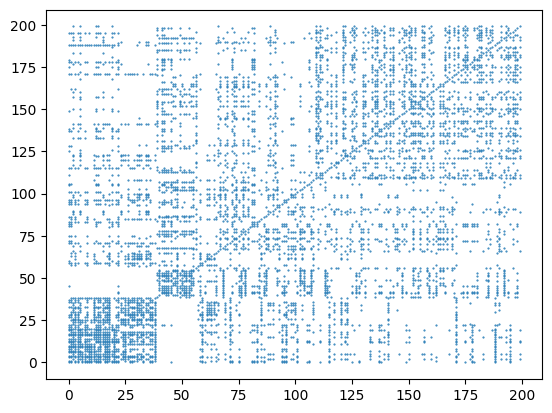

In [67]:
# plot the data points based on the threshold
pca_mat = np.array(pca.components_)
pca_mat_transpose = np.transpose(pca_mat)

P = np.matmul(pca_mat_transpose,pca_mat)


for i in range(0,200):
    for j in range(0,200):
        r = P[i][j] / sqrt(P[i][i]*P[j][j])
        # P[i][j] = r
        if r<0.1:
            P[i][j] = 0
        else:
            P[i][j] = 1

x = []
y = []

for i in range(0,200):
    for j in range(0,200):
        if P[i][j]==1:
            x.append(i)
            y.append(j)

plt.scatter(x,y,marker=".",s=1)
plt.show()